In [3]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from PIL import Image

In [4]:
files_to_ignore = ['.DS_Store']
script_1_path = '../../model_results/gru_results/script_3/GRU_sl15/'
script_1_folders = os.listdir(script_1_path)
script_1_folders = [folder for folder in script_1_folders if folder not in files_to_ignore]
script_1_folders

['GRU_2023-09-20_12-11-01__1996',
 'GRU_2023-09-23_19-13-21__3456',
 'GRU_2023-09-20_17-29-57__3256',
 'GRU_2023-09-16_23-06-04__656',
 'final_merged_results',
 'GRU_2023-09-18_14-02-23__1792']

In [5]:
results_path = f'{script_1_path}final_merged_results/'
df = pd.read_csv(f'{results_path}gru_script_3_gridSearch_results.csv')
df

script_num  search_count  sequence_length  units  dropout_rate  \
0              3             1               15     32           0.0   
1              3             2               15     32           0.0   
2              3             3               15     32           0.0   
3              3             4               15     32           0.0   
4              3             5               15     32           0.0   
...          ...           ...              ...    ...           ...   
3019           3          3452               15    128           0.6   
3020           3          3453               15    128           0.6   
3021           3          3454               15    128           0.6   
3022           3          3455               15    128           0.6   
3023           3          3456               15    128           0.6   

     activation_function             loss_function optimizer  num_epochs  \
0                sigmoid  categorical_crossentropy       SGD         250   
1                sigmoid  categorical_crossentropy       SGD         250   
2                sigmoid  categorical_crossentropy       SGD         250   
3                sigmoid  categorical_crossentropy       SGD         250   
4                sigmoid  categorical_crossentropy       SGD         500   
...                  ...                       ...       ...         ...   
3019             softmax                     hinge      Adam         500   
3020             softmax                     hinge      Adam        1000   
3021             softmax                     hinge      Adam        1000   
3022             softmax                     hinge      Adam        1000   
3023             softmax                     hinge      Adam        1000   

      batch_size  ...  test_accuracy             precision_values  \
0            512  ...         0.3945  {0: 0.57, 1: 0.26, 2: 0.23}   
1           1024  ...         0.3885   {0: 0.56, 1: 0.3, 2: 0.21}   
2           2048  ...         0.4328  {0: 0.58, 1: 0.31, 2: 0.16}   
3           4096  ...         0.4560  {0: 0.59, 1: 0.32, 2: 0.17}   
4            512  ...         0.3447  {0: 0.55, 1: 0.27, 2: 0.18}   
...          ...  ...            ...                          ...   
3019        4096  ...         0.3726  {0: 0.63, 1: 0.29, 2: 0.18}   
3020         512  ...         0.3515  {0: 0.59, 1: 0.28, 2: 0.23}   
3021        1024  ...         0.3554  {0: 0.63, 1: 0.28, 2: 0.21}   
3022        2048  ...         0.3363  {0: 0.57, 1: 0.29, 2: 0.18}   
3023        4096  ...         0.3873  {0: 0.67, 1: 0.28, 2: 0.23}   

                    recall_values                    f1_scores  \
0     {0: 0.45, 1: 0.41, 2: 0.19}   {0: 0.5, 1: 0.32, 2: 0.21}   
1     {0: 0.37, 1: 0.59, 2: 0.12}  {0: 0.45, 1: 0.39, 2: 0.16}   
2      {0: 0.5, 1: 0.51, 2: 0.06}  {0: 0.54, 1: 0.38, 2: 0.09}   
3      {0: 0.57, 1: 0.42, 2: 0.1}  {0: 0.58, 1: 0.36, 2: 0.12}   
4     {0: 0.32, 1: 0.46, 2: 0.25}   {0: 0.4, 1: 0.34, 2: 0.21}   
...                           ...                          ...   
3019   {0: 0.35, 1: 0.5, 2: 0.25}  {0: 0.45, 1: 0.37, 2: 0.21}   
3020  {0: 0.28, 1: 0.56, 2: 0.28}  {0: 0.38, 1: 0.37, 2: 0.25}   
3021   {0: 0.29, 1: 0.53, 2: 0.3}   {0: 0.4, 1: 0.37, 2: 0.25}   
3022  {0: 0.24, 1: 0.59, 2: 0.26}  {0: 0.34, 1: 0.39, 2: 0.21}   
3023  {0: 0.35, 1: 0.53, 2: 0.28}  {0: 0.46, 1: 0.36, 2: 0.26}   

                                         macro_averages  \
0     {'precision': 0.35, 'recall': 0.35, 'f1_score'...   
1     {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
2     {'precision': 0.35, 'recall': 0.36, 'f1_score'...   
3     {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
4     {'precision': 0.34, 'recall': 0.34, 'f1_score'...   
...                                                 ...   
3019  {'precision': 0.37, 'recall': 0.37, 'f1_score'...   
3020  {'precision': 0.37, 'recall': 0.37, 'f1_score'...   
3021  {'precision': 0.37, 'recall': 0.37, 'f1_score'...   
3022  {'precisio

In [6]:
df.dtypes

script_num                 int64
search_count               int64
sequence_length            int64
units                      int64
dropout_rate             float64
activation_function       object
loss_function             object
optimizer                 object
num_epochs                 int64
batch_size                 int64
seed_value                 int64
training_loss            float64
training_accuracy        float64
validation_loss          float64
validation_accuracy      float64
test_loss                float64
test_accuracy            float64
precision_values          object
recall_values             object
f1_scores                 object
macro_averages            object
weighted_averages         object
model_parameters          object
model_keys                object
classification_report     object
confusion_matrix          object
dtype: object

In [7]:
## Filter rows to get rid of certain parameter combinations
rows_to_remove = []

for indx, row in df.iterrows():
    if (row['activation_function'] == 'relu' and row['loss_function'] == 'categorical_crossentropy') or \
       (row['activation_function'] == 'relu' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'sigmoid' and row['loss_function'] == 'binary_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'sigmoid' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'binary_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'categorical_crossentropy' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'softmax' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam') or \
       (row['activation_function'] == 'tanh' and row['loss_function'] == 'hinge' and row['optimizer'] == 'Adam'):
        rows_to_remove.append(indx)

df.drop(rows_to_remove, inplace=True) 
df

script_num  search_count  sequence_length  units  dropout_rate  \
0              3             1               15     32           0.0   
1              3             2               15     32           0.0   
2              3             3               15     32           0.0   
3              3             4               15     32           0.0   
4              3             5               15     32           0.0   
...          ...           ...              ...    ...           ...   
3007           3          3440               15    128           0.6   
3008           3          3441               15    128           0.6   
3009           3          3442               15    128           0.6   
3010           3          3443               15    128           0.6   
3011           3          3444               15    128           0.6   

     activation_function             loss_function optimizer  num_epochs  \
0                sigmoid  categorical_crossentropy       SGD         250   
1                sigmoid  categorical_crossentropy       SGD         250   
2                sigmoid  categorical_crossentropy       SGD         250   
3                sigmoid  categorical_crossentropy       SGD         250   
4                sigmoid  categorical_crossentropy       SGD         500   
...                  ...                       ...       ...         ...   
3007             softmax                     hinge       SGD         500   
3008             softmax                     hinge       SGD        1000   
3009             softmax                     hinge       SGD        1000   
3010             softmax                     hinge       SGD        1000   
3011             softmax                     hinge       SGD        1000   

      batch_size  ...  test_accuracy             precision_values  \
0            512  ...         0.3945  {0: 0.57, 1: 0.26, 2: 0.23}   
1           1024  ...         0.3885   {0: 0.56, 1: 0.3, 2: 0.21}   
2           2048  ...         0.4328  {0: 0.58, 1: 0.31, 2: 0.16}   
3           4096  ...         0.4560  {0: 0.59, 1: 0.32, 2: 0.17}   
4            512  ...         0.3447  {0: 0.55, 1: 0.27, 2: 0.18}   
...          ...  ...            ...                          ...   
3007        4096  ...         0.4343  {0: 0.58, 1: 0.29, 2: 0.07}   
3008         512  ...         0.4162   {0: 0.59, 1: 0.29, 2: 0.1}   
3009        1024  ...         0.4334   {0: 0.6, 1: 0.29, 2: 0.03}   
3010        2048  ...         0.4519  {0: 0.61, 1: 0.31, 2: 0.09}   
3011        4096  ...         0.4435   {0: 0.59, 1: 0.29, 2: 0.0}   

                    recall_values                    f1_scores  \
0     {0: 0.45, 1: 0.41, 2: 0.19}   {0: 0.5, 1: 0.32, 2: 0.21}   
1     {0: 0.37, 1: 0.59, 2: 0.12}  {0: 0.45, 1: 0.39, 2: 0.16}   
2      {0: 0.5, 1: 0.51, 2: 0.06}  {0: 0.54, 1: 0.38, 2: 0.09}   
3      {0: 0.57, 1: 0.42, 2: 0.1}  {0: 0.58, 1: 0.36, 2: 0.12}   
4     {0: 0.32, 1: 0.46, 2: 0.25}   {0: 0.4, 1: 0.34, 2: 0.21}   
...                           ...                          ...   
3007   {0: 0.51, 1: 0.54, 2: 0.0}   {0: 0.54, 1: 0.37, 2: 0.0}   
3008   {0: 0.45, 1: 0.6, 2: 0.01}  {0: 0.51, 1: 0.39, 2: 0.01}   
3009   {0: 0.49, 1: 0.58, 2: 0.0}   {0: 0.53, 1: 0.39, 2: 0.0}   
3010   {0: 0.51, 1: 0.61, 2: 0.0}   {0: 0.55, 1: 0.41, 2: 0.0}   
3011   {0: 0.52, 1: 0.55, 2: 0.0}   {0: 0.55, 1: 0.38, 2: 0.0}   

                                         macro_averages  \
0     {'precision': 0.35, 'recall': 0.35, 'f1_score'...   
1     {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
2     {'precision': 0.35, 'recall': 0.36, 'f1_score'...   
3     {'precision': 0.36, 'recall': 0.36, 'f1_score'...   
4     {'precision': 0.34, 'recall': 0.34, 'f1_score'...   
...                                                 ...   
3007  {'precision': 0.31, 'recall': 0.35, 'f1_score'...   
3008  {'precision': 0.32, 'recall': 0.35, 'f1_score'...   
3009  {'precision': 0.31, 'recall': 0.36, 'f1_score'...   
3010  {'precisio

In [8]:
top_n_model_test_accuracies = df['test_accuracy'].nlargest(100)
top_n_model_test_accuracy_indexes = top_n_model_test_accuracies.index

In [9]:
top_n_model_test_accuracy_indexes

Index([ 995,  985,  990,  707, 2069, 1545, 2074, 2064, 2065, 2070,  702, 1038,
        698,  703,  697, 2066, 2071, 2075,  986,  745, 2694,  747,  678,  991,
       1039, 1546, 2697, 2909, 2067, 1538, 2910, 1252, 1018, 1019, 1022, 1023,
       1315, 1595, 1588,  989, 2051, 1611,  984, 2911,  971,  987,  411,  994,
       1306,  410, 2482,  699, 1848,  415, 1536, 1853,  964, 1858, 2476,  974,
       1855, 1850, 2690, 1849, 1859, 1854, 1541, 1547,  459, 1305, 1254,  414,
        982,  409,  104, 2262, 1831,  440, 1051,  463, 1015,  419,  398,  402,
        123, 1835, 1826, 1827, 1851, 1571, 2689, 1302, 1592, 1034,  961, 1561,
       2477, 1540,  690,  454],
      dtype='int64')

In [10]:
top_n_models = df.loc[top_n_model_test_accuracy_indexes]
print(type(top_n_models))
top_n_models

<class 'pandas.core.frame.DataFrame'>


script_num  search_count  sequence_length  units  dropout_rate  \
995            3           996               15     32           0.6   
985            3           986               15     32           0.6   
990            3           991               15     32           0.6   
707            3           708               15     32           0.4   
2069           3          2142               15     64           0.6   
...          ...           ...              ...    ...           ...   
1561           3          1562               15     64           0.2   
2477           3          2694               15    128           0.2   
1540           3          1541               15     64           0.2   
690            3           691               15     32           0.4   
454            3           455               15     32           0.2   

     activation_function             loss_function optimizer  num_epochs  \
995                 relu                     hinge       SGD        1000   
985                 relu                     hinge       SGD         250   
990                 relu                     hinge       SGD         500   
707                 relu                     hinge       SGD        1000   
2069                relu                     hinge       SGD         500   
...                  ...                       ...       ...         ...   
1561                relu                     hinge       SGD         250   
2477                relu       binary_crossentropy       SGD         500   
1540                relu       binary_crossentropy       SGD         500   
690                 relu       binary_crossentropy      Adam         500   
454                 tanh  categorical_crossentropy      Adam        1000   

      batch_size  ...  test_accuracy             precision_values  \
995         4096  ...         0.5966    {0: 0.6, 1: 0.57, 2: 0.0}   
985         1024  ...         0.5934    {0: 0.6, 1: 0.54, 2: 0.0}   
990         2048  ...         0.5927    {0: 0.6, 1: 0.54, 2: 0.0}   
707         4096  ...         0.5903   {0: 0.61, 1: 0.46, 2: 0.0}   
2069        1024  ...         0.5855    {0: 0.6, 1: 0.48, 2: 0.4}   
...          ...  ...            ...                          ...   
1561        1024  ...         0.5419   {0: 0.6, 1: 0.39, 2: 0.11}   
2477        1024  ...         0.5414  {0: 0.59, 1: 0.34, 2: 0.33}   
1540         512  ...         0.5412  {0: 0.57, 1: 0.28, 2: 0.13}   
690         2048  ...         0.5411   {0: 0.6, 1: 0.37, 2: 0.16}   
454         2048  ...         0.5409    {0: 0.6, 1: 0.25, 2: 0.2}   

                    recall_values                    f1_scores  \
995    {0: 0.98, 1: 0.13, 2: 0.0}   {0: 0.74, 1: 0.21, 2: 0.0}   
985    {0: 0.98, 1: 0.12, 2: 0.0}    {0: 0.74, 1: 0.2, 2: 0.0}   
990    {0: 0.98, 1: 0.12, 2: 0.0}    {0: 0.74, 1: 0.2, 2: 0.0}   
707    {0: 0.94, 1: 0.19, 2: 0.0}   {0: 0.74, 1: 0.27, 2: 0.0}   
2069   {0: 0.91, 1: 0.23, 2: 0.0}   {0: 0.73, 1: 0.31, 2: 0.0}   
...                           ...                          ...   
1561  {0: 0.83, 1: 0.23, 2: 0.04}   {0: 0.7, 1: 0.29, 2: 0.06}   
2477  {0: 0.84, 1: 0.22, 2: 0.02}  {0: 0.69, 1: 0.27, 2: 0.05}   
1540   {0: 0.89, 1: 0.11, 2: 0.0}    {0: 0.7, 1: 0.16, 2: 0.0}   
690     {0: 0.8, 1: 0.3, 2: 0.02}  {0: 0.68, 1: 0.33, 2: 0.03}   
454   {0: 0.88, 1: 0.03, 2: 0.16}  {0: 0.72, 1: 0.06, 2: 0.18}   

                                         macro_averages  \
995   {'precision': 0.39, 'recall': 0.37, 'f1_score'...   
985   {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
990   {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
707   {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
2069  {'precision': 0.49, 'recall': 0.38, 'f1_score'...   
...                                                 ...   
1561  {'precision': 0.37, 'recall': 0.37, 'f1_score'...   
2477  {'precision': 0.42, 'recall': 0.36, 'f1_score'...   
1540  {'precision': 0.33, 'recall': 0.33, 'f1_score'...   
690   {'precisio

In [11]:
# top_n_models.to_csv('./LSTM_s1_top_100_model_data.csv')

In [12]:
# Filter models that have a training and test accuracy difference of more than 10%

for indx, row in top_n_models.iterrows():
    if abs(row['test_accuracy'] - row['training_accuracy']) > 0.1:
        print(abs(row['test_accuracy'] - row['training_accuracy']))
        top_n_models.drop(indx, inplace = True)

0.22230000000000005


In [13]:
top_n_models

script_num  search_count  sequence_length  units  dropout_rate  \
995            3           996               15     32           0.6   
985            3           986               15     32           0.6   
990            3           991               15     32           0.6   
707            3           708               15     32           0.4   
2069           3          2142               15     64           0.6   
...          ...           ...              ...    ...           ...   
961            3           962               15     32           0.6   
1561           3          1562               15     64           0.2   
2477           3          2694               15    128           0.2   
1540           3          1541               15     64           0.2   
690            3           691               15     32           0.4   

     activation_function        loss_function optimizer  num_epochs  \
995                 relu                hinge       SGD        1000   
985                 relu                hinge       SGD         250   
990                 relu                hinge       SGD         500   
707                 relu                hinge       SGD        1000   
2069                relu                hinge       SGD         500   
...                  ...                  ...       ...         ...   
961                 relu  binary_crossentropy       SGD         250   
1561                relu                hinge       SGD         250   
2477                relu  binary_crossentropy       SGD         500   
1540                relu  binary_crossentropy       SGD         500   
690                 relu  binary_crossentropy      Adam         500   

      batch_size  ...  test_accuracy             precision_values  \
995         4096  ...         0.5966    {0: 0.6, 1: 0.57, 2: 0.0}   
985         1024  ...         0.5934    {0: 0.6, 1: 0.54, 2: 0.0}   
990         2048  ...         0.5927    {0: 0.6, 1: 0.54, 2: 0.0}   
707         4096  ...         0.5903   {0: 0.61, 1: 0.46, 2: 0.0}   
2069        1024  ...         0.5855    {0: 0.6, 1: 0.48, 2: 0.4}   
...          ...  ...            ...                          ...   
961         1024  ...         0.5421   {0: 0.61, 1: 0.42, 2: 0.1}   
1561        1024  ...         0.5419   {0: 0.6, 1: 0.39, 2: 0.11}   
2477        1024  ...         0.5414  {0: 0.59, 1: 0.34, 2: 0.33}   
1540         512  ...         0.5412  {0: 0.57, 1: 0.28, 2: 0.13}   
690         2048  ...         0.5411   {0: 0.6, 1: 0.37, 2: 0.16}   

                    recall_values                    f1_scores  \
995    {0: 0.98, 1: 0.13, 2: 0.0}   {0: 0.74, 1: 0.21, 2: 0.0}   
985    {0: 0.98, 1: 0.12, 2: 0.0}    {0: 0.74, 1: 0.2, 2: 0.0}   
990    {0: 0.98, 1: 0.12, 2: 0.0}    {0: 0.74, 1: 0.2, 2: 0.0}   
707    {0: 0.94, 1: 0.19, 2: 0.0}   {0: 0.74, 1: 0.27, 2: 0.0}   
2069   {0: 0.91, 1: 0.23, 2: 0.0}   {0: 0.73, 1: 0.31, 2: 0.0}   
...                           ...                          ...   
961     {0: 0.8, 1: 0.3, 2: 0.04}  {0: 0.69, 1: 0.35, 2: 0.05}   
1561  {0: 0.83, 1: 0.23, 2: 0.04}   {0: 0.7, 1: 0.29, 2: 0.06}   
2477  {0: 0.84, 1: 0.22, 2: 0.02}  {0: 0.69, 1: 0.27, 2: 0.05}   
1540   {0: 0.89, 1: 0.11, 2: 0.0}    {0: 0.7, 1: 0.16, 2: 0.0}   
690     {0: 0.8, 1: 0.3, 2: 0.02}  {0: 0.68, 1: 0.33, 2: 0.03}   

                                         macro_averages  \
995   {'precision': 0.39, 'recall': 0.37, 'f1_score'...   
985   {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
990   {'precision': 0.38, 'recall': 0.37, 'f1_score'...   
707   {'precision': 0.36, 'recall': 0.38, 'f1_score'...   
2069  {'precision': 0.49, 'recall': 0.38, 'f1_score'...   
...                                                 ...   
961   {'precision': 0.38, 'recall': 0.38, 'f1_score'...   
1561  {'precision': 0.37, 'recall': 0.37, 'f1_score'...   
2477  {'precision': 0.42, 'recall': 0.36, 'f1_score'...   
1540  {'precision': 0.33, 'recall': 0.33, 'f1_score'...   
690   {'precision

In [18]:
def search_file_recursive(folder_path, target_file):
    for root, _, files in os.walk(folder_path):
        if target_file in files:
            return os.path.join(root, target_file)
    return None

top_n_model_parameters = []
top_n_unique_model_parameters = []
seen = set()

for indx, row in top_n_models.iterrows():
    cm = row['confusion_matrix']
    parameter = re.split(r'confusion_matrix_(.*?)_\d+\.png', cm)[1]
    top_n_model_parameters.append((indx, parameter))
    if parameter not in seen:
        top_n_unique_model_parameters.append((indx, parameter))
        seen.add(parameter)

# DataFrame with the unique models
top_n_unique_models_df = top_n_models.loc[[indx for indx, _ in top_n_unique_model_parameters]]

print('# of Top N model parameters', len(top_n_model_parameters))
print('# of Unique Top N model parameters', len(top_n_unique_model_parameters))

processed_parameters = set()  # To keep track of processed model_parameters

for parameter in top_n_unique_model_parameters:
    indx, model_parameter = parameter
    for folder in sorted(script_1_folders):
        folder_path = f'{script_1_path}{folder}'
        found_path = search_file_recursive(folder_path, f'batch_size_comparison_{model_parameter}.png')
        if found_path:
            # Check if the model_parameter has already been processed
            if model_parameter in processed_parameters:
                continue  # Skip processing this model_parameter again

            batch_size_path = found_path
            top_n_unique_models_df.at[indx, 'model_parameter'] = model_parameter
            top_n_unique_models_df.at[indx, 'batch_size_path'] = batch_size_path
            
            # Mark the model_parameter as processed
            processed_parameters.add(model_parameter)

# of Top N model parameters 99
# of Unique Top N model parameters 59


In [19]:
top_n_unique_models_df.to_csv(f'{results_path}gru_script_3_unique_top_n_models.csv')
top_n_unique_models_df

script_num  search_count  sequence_length  units  dropout_rate  \
995            3           996               15     32           0.6   
985            3           986               15     32           0.6   
990            3           991               15     32           0.6   
707            3           708               15     32           0.4   
2069           3          2142               15     64           0.6   
1545           3          1546               15     64           0.2   
2074           3          2147               15     64           0.6   
2064           3          2137               15     64           0.6   
702            3           703               15     32           0.4   
1038           3          1039               15     32           0.6   
698            3           699               15     32           0.4   
745            3           746               15     32           0.4   
2694           3          2983               15    128           0.4   
678            3           679               15     32           0.4   
2697           3          2986               15    128           0.4   
2909           3          3270               15    128           0.6   
1538           3          1539               15     64           0.2   
1252           3          1253               15     64           0.0   
1018           3          1019               15     32           0.6   
1022           3          1023               15     32           0.6   
1315           3          1316               15     64           0.0   
1595           3          1596               15     64           0.2   
1588           3          1589               15     64           0.2   
2051           3          2124               15     64           0.6   
1611           3          1612               15     64           0.2   
971            3           972               15     32           0.6   
411            3           412               15     32           0.2   
1306           3          1307               15     64           0.0   
2482           3          2699               15    128           0.2   
1848           3          1849               15     64           0.4   
415            3           416               15     32           0.2   
1853           3          1854               15     64           0.4   
964            3           965               15     32           0.6   
1858           3          1859               15     64           0.4   
2476           3          2693               15    128           0.2   
974            3           975               15     32           0.6   
2690           3          2979               15    128           0.4   
1541           3          1542               15     64           0.2   
459            3           460               15     32           0.2   
982            3           983               15     32           0.6   
104            3           105               15     32           0.0   
2262           3          2407               15    128           0.0   
1831           3          1832               15     64           0.4   
440            3           441               15     32           0.2   
1051           3          1052               15     32           0.6   
463            3           464               15     32           0.2   
1015           3          1016               15     32           0.6   
419            3           420               15     32           0.2   
398            3           399               15     32           0.2   
402            3           403               15     32           0.2   
123            3           124               15     32           0.0   
1835           3          1836               15     64           0.4   
1826           3          1827               15     64           0.4   
1571           3          1572               15     64           0.2   
1302           3          1303               1

In [20]:
max(top_n_unique_models_df['test_accuracy'])

0.5966

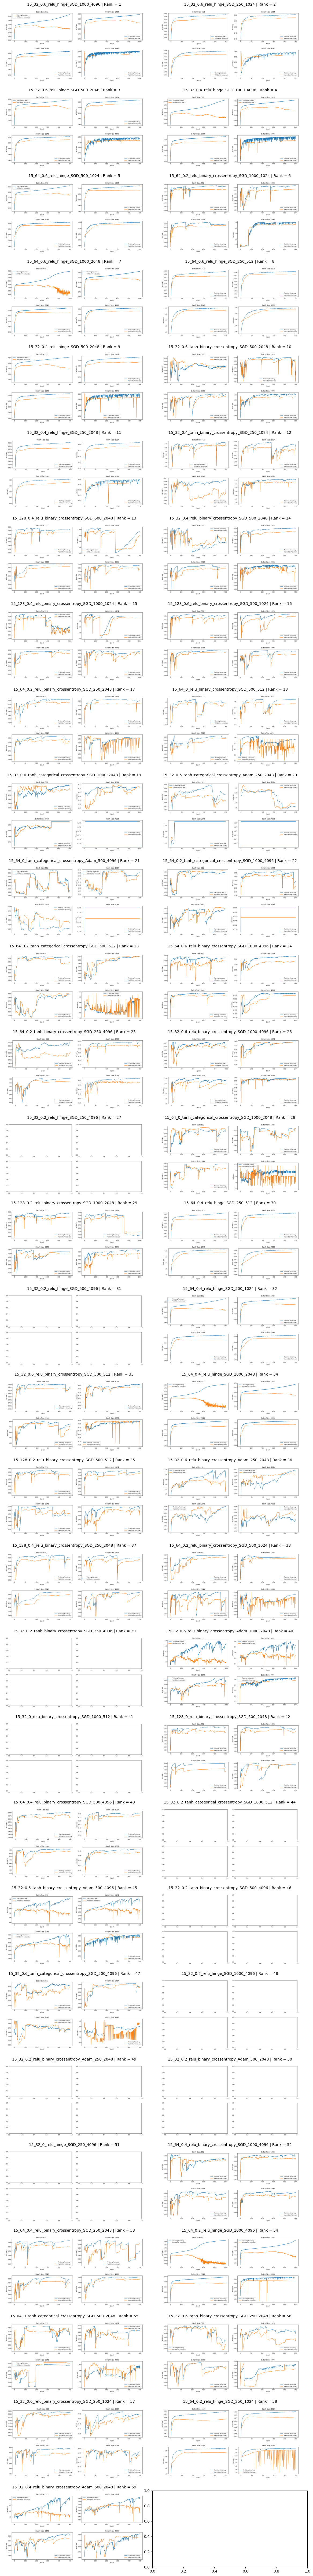

In [21]:
import math
# Define the number of rows and columns
num_rows = math.ceil(len(top_n_unique_model_parameters) / 2)
num_cols = 2

# Calculate the figure size based on the image dimensions
image_width = 1500  # Width of your images
image_height = 800  # Height of your images
fig_width = 12  # Adjust this based on your preference
fig_height = (fig_width / image_width) * image_height * num_rows / num_cols

# Create the figure and subplots
figure, axs = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.2, hspace=0.4)

i = 0
for indx, row in top_n_unique_models_df.iterrows():
    row_indx = i // num_cols
    col_indx = i % num_cols
    i += 1
    ax = axs[row_indx, col_indx]
    
    model_parameter = row['model_parameter']
    fig_path = row['batch_size_path']
    img = Image.open(fig_path)
#     ax.imshow(img)

    
    # Display the image at its original aspect ratio
    ax.imshow(img)
    parameter = re.split(r'confusion_matrix_(.*?).png', row['confusion_matrix'])[1]
    ax.set_title(f'{parameter} | Rank = {i}', fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.savefig(f'{results_path}gru_script_3_top_n_model_train_val_accuracies.png')
plt.show()

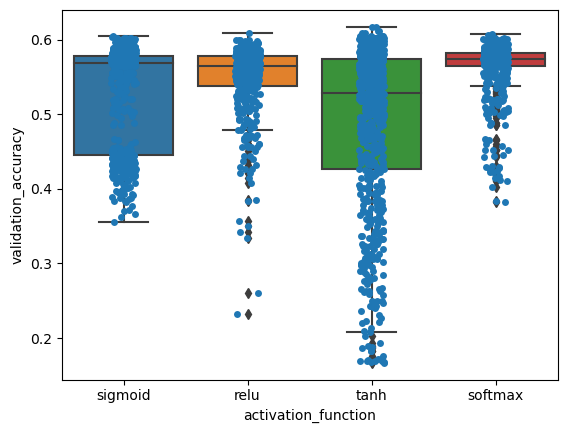

In [20]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='validation_accuracy', data=df)
sns.stripplot(x='activation_function', y='validation_accuracy', data=df)
plt.show()

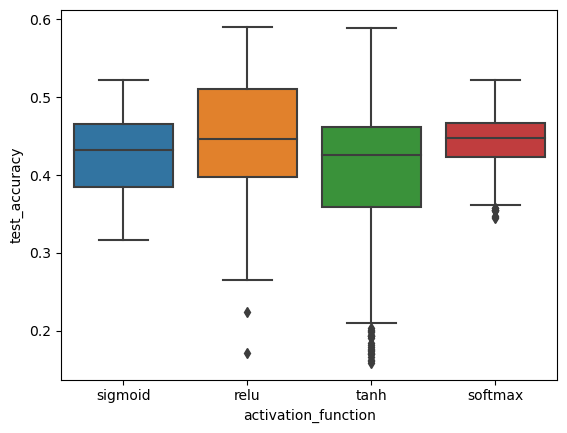

In [21]:
# Box plot for 'validation_accuracy' grouped by 'activation_function'
sns.boxplot(x='activation_function', y='test_accuracy', data=df)
# sns.stripplot(x='activation_function', y='test_accuracy', data=df)
plt.show()